In [2]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Import the datetime module to work with date and time data
import datetime
from datetime import datetime

# Set pandas options to display a maximum of 9999 rows in the output
pd.options.display.max_rows = 9999

# Disable chained assignment warnings to prevent display of SettingWithCopyWarning messages
pd.options.mode.chained_assignment = None 

# The above options help in better visualization and avoid common warnings

In [3]:
# Read the railway dataset from a CSV file named 'railway.csv' into a pandas DataFrame
railway_data = pd.read_csv('railway.csv')





# Exploring Data Insights:  Understanding the Data

In [4]:
# Display the first few rows of the DataFrame to verify the content
# This helps to ensure that the data has been read correctly
print("First few rows of the railway dataset:")
print(railway_data.head())

First few rows of the railway dataset:
            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card     None     Standard     Advance      3   
3    Credit Card     None     Standard     Advance     13   
4    Contactless     None     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-

In [5]:
# Display the last few rows of the DataFrame to verify the content
# This helps to see the end of the dataset and ensures no data is missing at the end
print("\nLast few rows of the railway dataset:")
print(railway_data.tail())


Last few rows of the railway dataset:
                Transaction ID Date of Purchase Time of Purchase  \
31648  1304623d-b8b7-4999-8e9c       2024-04-30         18:42:58   
31649  7da22246-f480-417c-bc2f       2024-04-30         18:46:10   
31650  add9debf-46c1-4c75-b52d       2024-04-30         18:56:41   
31651  b92b047c-21fd-4859-966a       2024-04-30         19:51:47   
31652  1d5d89a2-bde5-410f-8f91       2024-04-30         20:05:39   

      Purchase Type Payment Method Railcard Ticket Class Ticket Type  Price  \
31648        Online    Credit Card     None     Standard    Off-Peak      4   
31649        Online    Contactless     None     Standard    Off-Peak     10   
31650       Station    Credit Card     None     Standard    Off-Peak      4   
31651       Station    Credit Card     None     Standard    Off-Peak     10   
31652       Station    Credit Card    Adult     Standard    Off-Peak      3   

           Departure Station    Arrival Destination Date of Journey  \
31648 

In [6]:
# Display basic information about the DataFrame, including column names and data types
print("\nBasic information about the railway dataset:")
print(railway_data.info())


Basic information about the railway dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey






# Data Cleaning

In [7]:
# Drop rows where all elements are missing (NaN)
df = railway_data.dropna(how='all')

In [9]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace= True)

In [10]:
# Check for missing values in each column of the DataFrame
# This step counts the number of missing (NaN) values in each column
df.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64





# Preparing The Data

In [11]:
# Convert 'Departure Time' column to datetime format
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# Convert 'Actual Arrival Time' column to datetime format
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'])

# Convert 'Arrival Time' column to datetime format
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'])

In [12]:
# Extract the hour component from 'Departure Time' and create a new 'Departure Hour' column
df['Departure Hour'] = df['Departure Time'].dt.hour

# Calculate the time difference in minutes between 'Actual Arrival Time' and 'Arrival Time'
# Convert hours to minutes and subtract the minutes to get the gap
df['Arrival Time Gap'] = (df['Actual Arrival Time'].dt.hour * 60 + df['Actual Arrival Time'].dt.minute) - (df['Arrival Time'].dt.hour * 60 + df['Arrival Time'].dt.minute)

In [45]:
# Replace 'Signal failure' with 'Signal Failure' in the 'Reason for Delay' column
df['Reason for Delay'] = df['Reason for Delay'].replace('Signal failure', 'Signal Failure')

In [31]:
# Displaying the first few rows of the DataFrame to inspect the current state of data
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Departure Hour,Arrival Time Gap
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-06-21 11:00:00,2024-06-21 13:30:00,2024-06-21 13:30:00,On Time,NaN,No,11,0.0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2024-06-21 09:45:00,2024-06-21 11:35:00,2024-06-21 11:40:00,Delayed,Signal Failure,No,9,5.0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-06-21 18:15:00,2024-06-21 18:45:00,2024-06-21 18:45:00,On Time,NaN,No,18,0.0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,2024-06-21 21:30:00,2024-06-21 22:30:00,2024-06-21 22:30:00,On Time,NaN,No,21,0.0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2024-06-21 16:45:00,2024-06-21 19:00:00,2024-06-21 19:00:00,On Time,NaN,No,16,0.0







# Analysis of the Most Popular Routes

In [32]:
# Grouping the DataFrame by 'Departure Station' and 'Arrival Destination', 
# and counting occurrences of each route
routes = df.groupby(['Departure Station','Arrival Destination']).size().reset_index(name='occurance')

# Setting the index of the DataFrame to 'Departure Station' and 'Arrival Destination'
routes = routes.set_index(['Departure Station','Arrival Destination'])

# Sorting the routes by the number of occurrences in descending order
routes = routes.sort_values(by='occurance', ascending=False)

# Selecting the top 8 routes with the highest occurrence for better visualization
routes = routes.head(8)

In [33]:
#View the most popular travel routes
routes

occurance
Departure Station     Arrival Destination             
Manchester Piccadilly Liverpool Lime Street       4628
London Euston         Birmingham New Street       4209
London Kings Cross    York                        3922
London Paddington     Reading                     3873
London St Pancras     Birmingham New Street       3471
Liverpool Lime Street Manchester Piccadilly       3002
                      London Euston               1097
London Euston         Manchester Piccadilly        712





# Visualizing the Most Popular Travel Routes

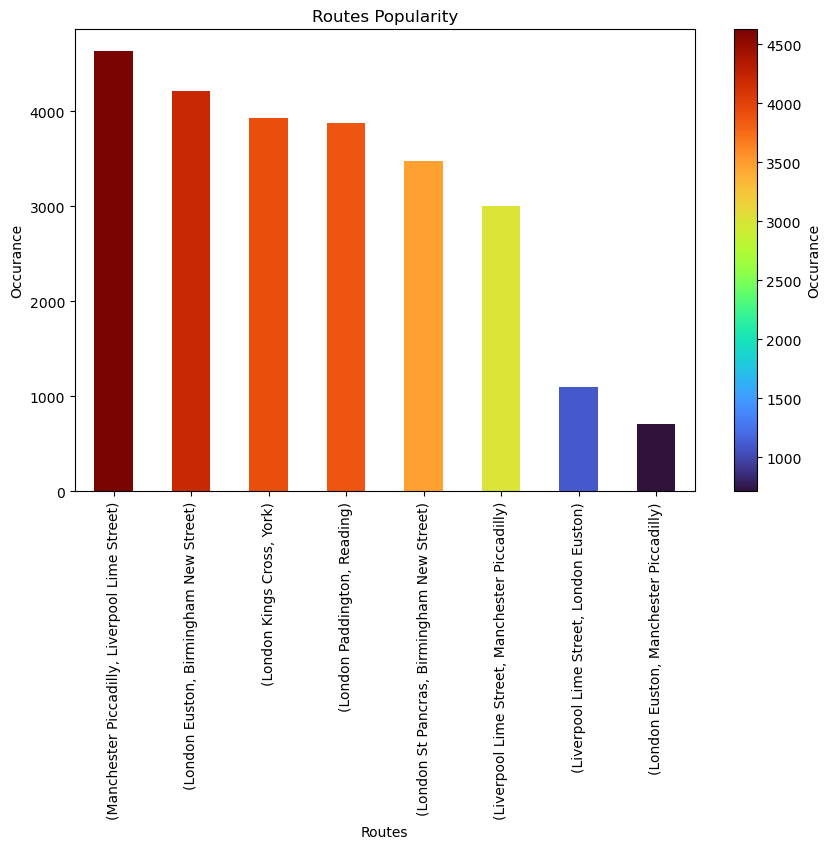

In [46]:
# Calculate normalized counts for 'occurance' to normalize the data between 0 and 1 for optimizing the colormap
normalized_counts = (routes['occurance'] - routes['occurance'].min()) / (routes['occurance'].max() - routes['occurance'].min())

# Generate a colormap based on normalized_counts using 'turbo' colormap
colormap = plt.cm.turbo(normalized_counts)

# Create a figure and axis (ax) object with a specified size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart of routes with color based on the colormap, hide the legend
routesbar = routes.plot.bar(y='occurance',color=colormap, legend=False, ax=ax)

# Create a ScalarMappable object (sm) for colormap to be used in colorbar
sm = plt.cm.ScalarMappable(cmap='turbo',norm=plt.Normalize(vmin=routes['occurance'].min(), vmax=routes['occurance'].max()))

sm.set_array([]) # Required for ScalarMappable to work correctly with colorbar

# Add a colorbar to the plot using the ScalarMappable (sm) with label for occurrence
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Occurance')

# Set labels for x-axis, y-axis, and title of the plot
plt.xlabel('Routes')
plt.ylabel('Occurance')
plt.title('Routes Popularity')

# Display the plot
plt.show()





# Preparing Data for Visualizing Peak Travel Times

In [35]:
# Grouping the DataFrame 'df' by 'Departure Hour' and counting the number of trips for each hour
hourly_departures = df.groupby('Departure Hour').size().reset_index(name='trips_count')

# Setting 'Departure Hour' as the index of the DataFrame 'hourly_departures'
hourly_departures = hourly_departures.set_index(['Departure Hour'])

# Sorting 'hourly_departures' by 'Departure Hour' in ascending order
hourly_departures = hourly_departures.sort_values(by='Departure Hour')

In [36]:
hourly_departures

,trips_count
Departure Hour,
0,853
1,644
2,942
3,543
4,1041
5,725
6,3112
7,2795
8,2179






# Visualizing  Peak Travel Times

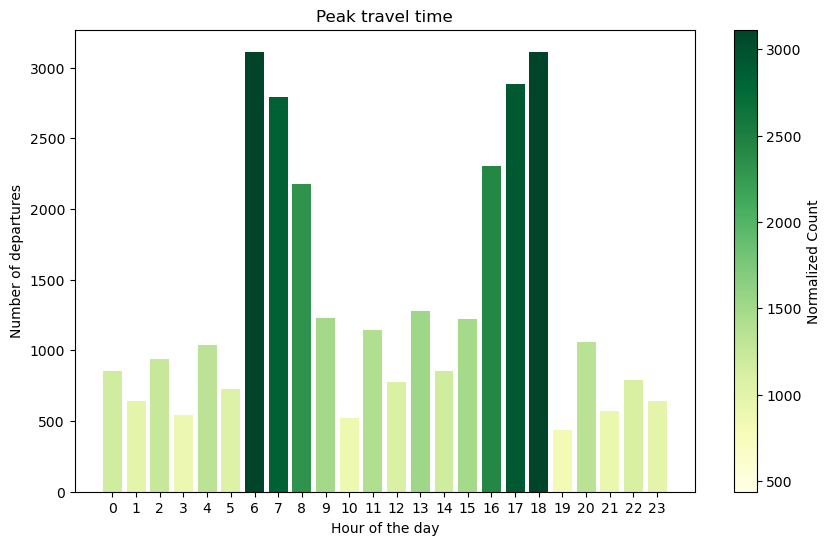

In [37]:
# Set the figure size for the plot
plt.figure(figsize=(10,6))

# Create a bar plot where x-axis represents 'Departure Hour', y-axis represents 'trips_count', and color is based on normalized values
plt.bar(hourly_departures.index,hourly_departures['trips_count'],color=plt.cm.YlGn(hourly_departures['trips_count']/hourly_departures['trips_count'].max()))

# Set labels for x-axis, y-axis, and title of the plot
plt.xlabel('Hour of the day')
plt.ylabel('Number of departures')
plt.title('Peak travel time')

# Set x-axis ticks to display every hour
plt.xticks(hourly_departures.index)

# Create a ScalarMappable (sm) with 'YlGn' colormap to be used for colorbar
sm = plt.cm.ScalarMappable(cmap='YlGn')
sm.set_array(hourly_departures['trips_count']) # Set array for ScalarMappable based on 'trips_count'

# Add a colorbar to the plot using ScalarMappable (sm) with label for normalized count
cbar = plt.colorbar(sm,ax=plt.gca(),label='Normalized Count')

# Display the plot
plt.show()





# Preparing Data for Visualizing Revenue Vary By Ticket Types and Classes

In [47]:
# Grouping the DataFrame 'df' by 'Ticket Type' and 'Ticket Class', and calculating the sum of 'Price' for each group
revenue_by_type = df.groupby(['Ticket Type','Ticket Class'])['Price'].sum().reset_index()

# Creating a pivot table from 'revenue_by_type' where 'Ticket Type' is the index, 'Ticket Class' is the columns, and 'Price' is the values
r_pivot_table = revenue_by_type.pivot(index='Ticket Type',columns='Ticket Class', values='Price').fillna(0)
r_pivot_table

Ticket Class,First Class,Standard
Ticket Type,,
Advance,66886,242388
Anytime,37841,171468
Off-Peak,44672,178666


# Visualizing Revenue Vary By Ticket Types and Classes

<Figure size 600x200 with 0 Axes>

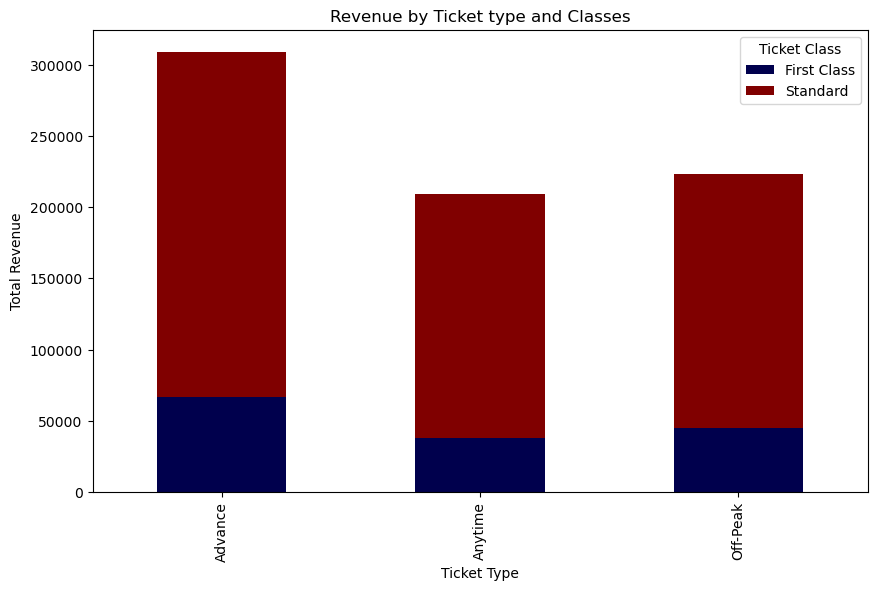

In [48]:
# Create a figure with size 10x6 inches
plt.figure(figsize=(6,2))

# Plotting the pivot table 'r_pivot_table' as a stacked bar plot
r_pivot_table.plot(kind='bar', stacked=True, colormap='seismic', figsize=(10,6))

# Setting labels for x-axis and y-axis, and title of the plot
plt.xlabel('Ticket Type')
plt.ylabel('Total Revenue')
plt.title('Revenue by Ticket type and Classes')

# Adding a legend with title for 'Ticket Class'
plt.legend(title='Ticket Class')

# Displaying the plot
plt.show()

# Analyzing And Visualizing The On Time Performance

In [49]:
# Counting the number of trips with 'Journey Status' not equal to 'Delayed' (i.e., on-time trips)
ontime_trips = df[df['Journey Status'] != 'Delayed'].shape[0]

# Counting the number of trips with 'Journey Status' equal to 'Delayed'
delayed_trips = df[df['Journey Status'] == 'Delayed'].shape[0]

# Total number of trips in the DataFrame 'df'
total_trips = df.shape[0]

In [51]:
# Calculating the percentage of on-time trips
ontime_percentage = (ontime_trips / total_trips) * 100

# Calculating the percentage of delayed trips
delayed_percentage = (delayed_trips / total_trips) * 100

In [52]:
# Printing the on-time performance percentage with 2 decimal places
print(f"On Time Performance: {ontime_percentage:.2f}%")

# Printing the delayed performance percentage with 2 decimal places
print(f"Delayed Performance: {delayed_percentage:.2f}%")

On Time Performance: 92.76%
Delayed Performance: 7.24%


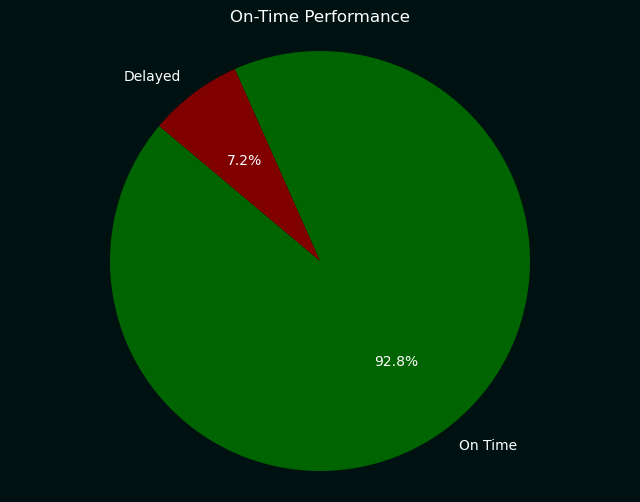

In [53]:
# Labels for the pie chart
labels = ["On Time","Delayed"]

# Sizes (percentages) for each slice of the pie chart
sizes = [ontime_percentage, delayed_percentage]

# Colors for each slice of the pie chart
colors = ['#006400', '#800000']

# Create a new figure with a specified size
fig = plt.figure(figsize=(8,6))

# Create a pie chart with specified parameters
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': "white"})

# Set the title of the pie chart
plt.title('On-Time Performance', color="white")

# Ensure the pie chart is circular
plt.axis('equal')

# Set the background color of the figure
fig.patch.set_facecolor('#001111')

# Display the pie chart
plt.show()





# -----   Analyzing the main contributing factors -----




# - >     Reason for Delay

In [54]:
# Filter the DataFrame for delayed journeys and count occurrences of each delay reason
delay_reasons = df[df['Journey Status'] == 'Delayed']['Reason for Delay'].value_counts()

# Display the resulting Series with delay reasons and their counts
delay_reasons

Weather               758
Technical Issue       472
Signal Failure        451
Staff Shortage        183
Staffing              172
Weather Conditions    169
Traffic                87
Name: Reason for Delay, dtype: int64

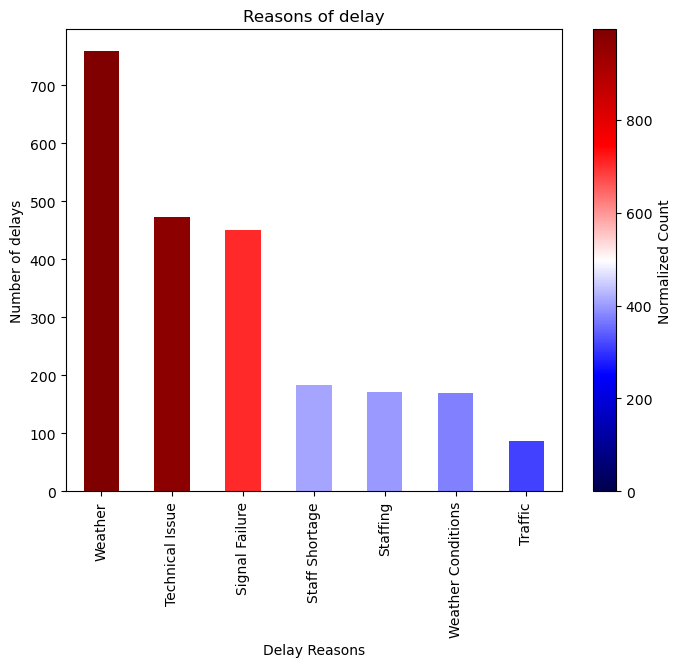

In [55]:
# Create a figure with a specified size
plt.figure(figsize=(8,6))

# Define colormap
cmap = 'seismic'

# Plot the bar chart with colormap based on normalized frequencies
delay_reasons.plot(kind="bar", color=plt.colormaps[cmap](df['Reason for Delay'].value_counts()/df['Reason for Delay'].value_counts().max()))

# Set the title of the plot
plt.title("Reasons of delay")

# Label the x-axis
plt.xlabel("Delay Reasons")

# Label the y-axis
plt.ylabel("Number of delays")

# Create a ScalarMappable object for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0,vmax=df['Reason for Delay'].value_counts().max()))
sm.set_array([])# Empty array required for ScalarMappable

# Add colorbar to the plot
cbar=plt.colorbar(sm, ax=plt.gca(),label="Normalized Count")

# Display the plot
plt.show()




# - >     Impact of Delay Reasons on Travel Delays
we are about to calculate how much time did the train got delayed for each reason

In [575]:
# Filter rows where Journey Status is Delayed and group by Reason for Delay, summing Arrival Time Gap
delay_reasons_sphase = df[df['Journey Status'] == 'Delayed'].groupby('Reason for Delay')['Arrival Time Gap'].sum().reset_index()

# Set Reason for Delay as index
delay_reasons_sphase = delay_reasons_sphase.set_index(['Reason for Delay'])

# Display the resulting DataFrame
delay_reasons_sphase

,Arrival Time Gap
Reason for Delay,
Signal Failure,17347.0
Signal failure,6020.0
Staff Shortage,13713.0
Staffing,4456.0
Technical Issue,11761.0
Traffic,2814.0
Weather,35480.0
Weather Conditions,5162.0


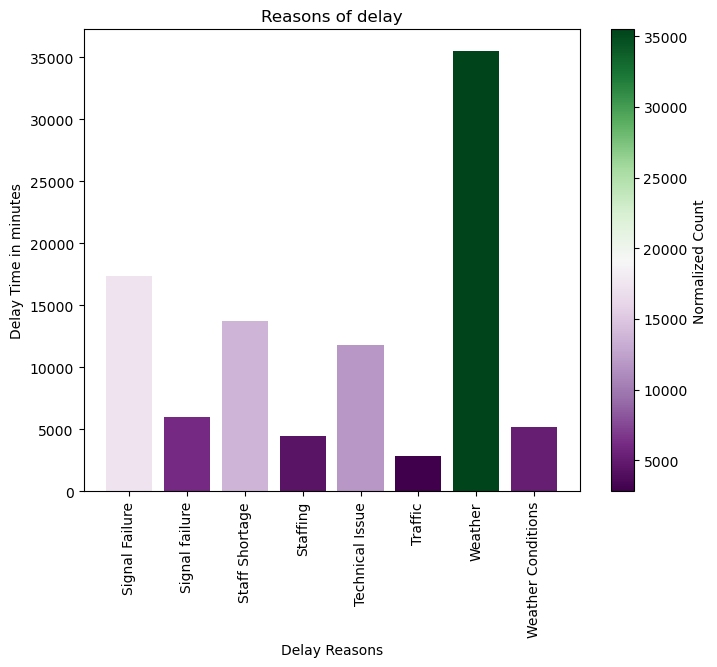

In [576]:
# Set up the figure size
plt.figure(figsize=(8,6))

# Choose colormap
cmap = 'PRGn'

# Normalize data based on minimum and maximum values of Arrival Time Gap
norm = plt.Normalize(vmin=delay_reasons_sphase['Arrival Time Gap'].min(), vmax=delay_reasons_sphase['Arrival Time Gap'].max())

# Map colors based on normalized values
colors = plt.colormaps.get_cmap(cmap)(norm(delay_reasons_sphase['Arrival Time Gap']))

# Create bar plot
bars = plt.bar(delay_reasons_sphase.index, delay_reasons_sphase['Arrival Time Gap'], color=colors)

# Add title and labels
plt.title("Reasons of delay")
plt.xlabel("Delay Reasons")
plt.ylabel("Delay Time in minutes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Create colorbar to show the mapping of colors to values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar=plt.colorbar(sm, ax=plt.gca(),label="Normalized Count")

# Display the plot
plt.show()




# - >     Is there a peak departure times for the delays?

In [577]:
# Calculate the number of delays grouped by departure hour
delays_by_hour = df[df['Journey Status'] == 'Delayed'].groupby('Departure Hour').size()

#Displaying the data
delays_by_hour

Departure Hour
0      17
1      14
3     125
4      16
5      37
6      74
7      15
8     728
9     221
11    300
14     15
15    143
16    206
17    381
dtype: int64

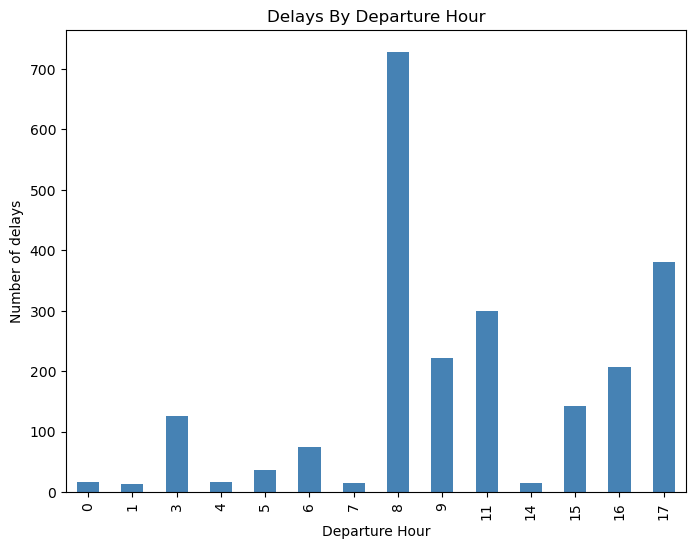

In [578]:
# Create a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8,6))

# Plotting the number of delays by departure hour as a bar plot, using steelblue color
delays_by_hour.plot(kind="bar", color="steelblue")

# Adding a label to the x-axis
plt.xlabel("Departure Hour")

# Adding a label to the y-axis
plt.ylabel("Number of delays")

# Adding a title to the plot
plt.title("Delays By Departure Hour")

# Displaying the plot
plt.show()




#  ->   The most departure station that causes a delay

In [579]:
# Filtering the DataFrame to select rows where 'Journey Status' is 'Delayed',
# then grouping by 'Departure Station' and calculating the size of each group
delays_by_departure_station = df[df['Journey Status'] == 'Delayed'].groupby('Departure Station').size()

# Displaying the series that contains the count of delays for each departure station
delays_by_departure_station

Departure Station
Birmingham New Street    140
Edinburgh Waverley        51
Liverpool Lime Street    900
London Euston            259
London Kings Cross       131
London Paddington         66
Manchester Piccadilly    672
Oxford                    15
York                      58
dtype: int64

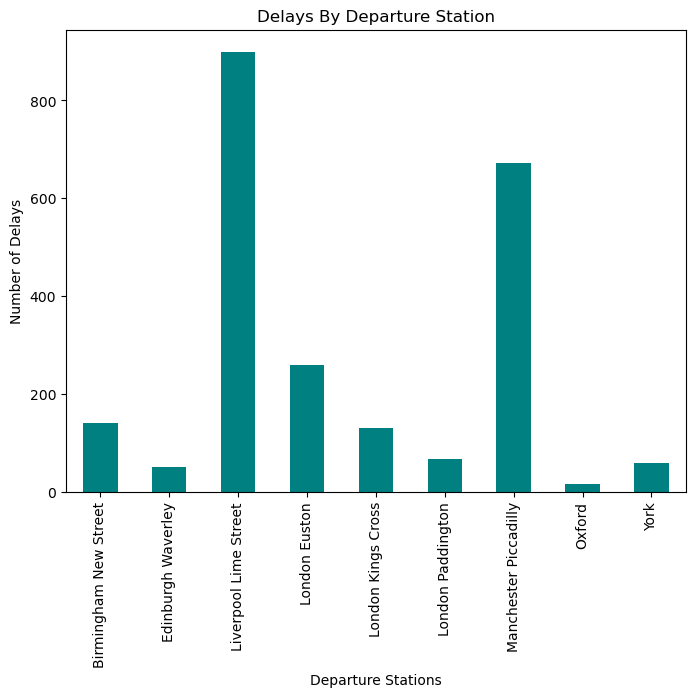

In [580]:
# Creating a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8,6))

# Plotting the number of delays by departure station as a bar plot, using teal color
delays_by_departure_station.plot(kind='bar', color='teal')

# Adding a label to the x-axis
plt.xlabel('Departure Stations')

# Adding a label to the y-axis
plt.ylabel('Number of Delays')

# Adding a title to the plot
plt.title('Delays By Departure Station')

# Displaying the plot
plt.show()




#  ->   The most arrival destination that causes a delay

In [581]:
# Filtering the DataFrame to select rows where 'Journey Status' is 'Delayed',
# then grouping by 'Arrival Destination' and calculating the size of each group
delays_by_arrival_destination = df[df['Journey Status'] == 'Delayed'].groupby('Arrival Destination').size()

# Displaying the series that contains the count of delays for each arrival destination
delays_by_arrival_destination

Arrival Destination
Birmingham New Street     242
Bristol Temple Meads       15
Doncaster                  27
Durham                     16
Leeds                      64
Liverpool Lime Street     354
London Euston            1064
London Kings Cross         51
London Paddington          13
Manchester Piccadilly     203
Nottingham                 14
Reading                    66
Wakefield                  15
York                      148
dtype: int64

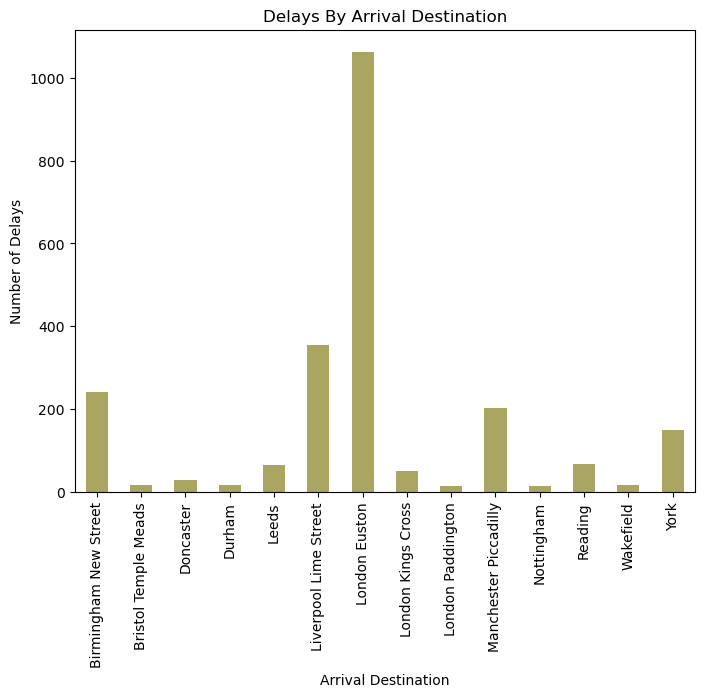

In [582]:
# Creating a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8,6))

# Plotting the number of delays by arrival destination as a bar plot, using a custom color (#AAA662)
delays_by_arrival_destination.plot(kind='bar', color='#AAA662')


# Adding a label to the x-axis
plt.xlabel('Arrival Destination')

# Adding a label to the y-axis
plt.ylabel('Number of Delays')

# Adding a title to the plot
plt.title('Delays By Arrival Destination')

# Displaying the plot
plt.show()



#  ->   London Euston: I see a lot of delay related to this station, so lets get it deeper


In [584]:
# Filtering the DataFrame to select rows where the journey status is 'Delayed' and the arrival destination is 'London Euston',
# then grouping by 'Reason for Delay' and calculating the size (count) of each group
london_euston_arrival_delay = df[(df['Journey Status'] == 'Delayed') & (df['Arrival Destination'] == 'London Euston')].groupby('Reason for Delay').size()

# Filtering the DataFrame to select rows where the journey status is 'Delayed' and either the departure station or arrival destination is 'London Euston',
# then grouping by 'Reason for Delay' and calculating the size (count) of each group
london_euston_total_delay = df[(df['Journey Status'] == 'Delayed') & ((df['Departure Station'] == 'London Euston') | (df['Arrival Destination'] == 'London Euston'))].groupby('Reason for Delay').size()

# Printing the series that contains the count of delays for each reason for delays specific to London Euston as the arrival destination
print(london_euston_arrival_delay)

# Printing the series that contains the count of delays for each reason for delays specific to London Euston as either the departure station or arrival destination
print(london_euston_total_delay)

Reason for Delay
Signal failure         24
Staff Shortage          4
Staffing               89
Technical Issue       187
Traffic                55
Weather               597
Weather Conditions    108
dtype: int64
Reason for Delay
Signal Failure         35
Signal failure        130
Staff Shortage         22
Staffing               89
Technical Issue       187
Traffic                55
Weather               697
Weather Conditions    108
dtype: int64





# ?? I noticed that this station is taking a big portion of the delay caused by weather


In [585]:
# Total weather delays across all reasons
total_weather_delay = delay_reasons['Weather']

# Weather delays specific to London Euston
londoneuston_weather_delay = london_euston_total_delay['Weather']

# Calculate the percentage of weather delays specific to London Euston relative to total weather delays
londoneuston_weatherdelay_perc = (londoneuston_weather_delay / total_weather_delay) * 100

# Calculate the percentage of weather delays for other cities relative to total weather delays
others_weatherdelay_perc = ((total_weather_delay-londoneuston_weather_delay) / total_weather_delay) * 100

# Print the calculated percentages with appropriate formatting
print(f"London Euston Weather Delay Percentage: {londoneuston_weatherdelay_perc:.2f} %")
print(f"Other Cities Weather Delay Percentage: {others_weatherdelay_perc:.2f} %")

London Euston Weather Delay Percentage: 91.95 %
Other Cities Weather Delay Percentage: 8.05 %


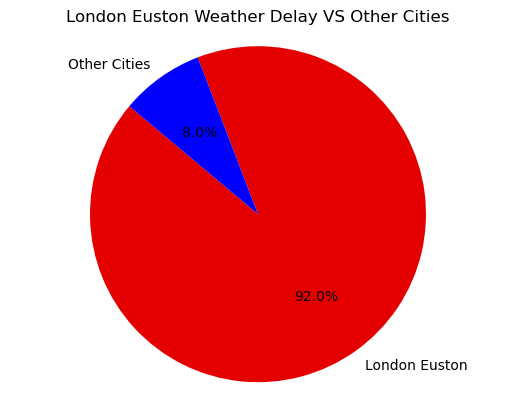

In [587]:
# Labels for the pie chart segments
labels = ['London Euston' , 'Other Cities']

# Sizes (percentages) of each segment
sizes = [londoneuston_weatherdelay_perc,others_weatherdelay_perc]

# Colors for each segment
colors = ['#E50000','#0000FF']

# Plotting the pie chart with specified parameters
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%",startangle=140,)

# Title for the pie chart
plt.title("London Euston Weather Delay VS Other Cities")

# Ensure the pie chart is circular
plt.axis("equal")

# Display the plot
plt.show()